In [2]:
import pandas as pd
import numpy as np
import ujson as json
import matplotlib.pyplot as plt
import os

### Get all .ndjson files from folder

In [4]:
data_files = os.listdir('./data/raw/')

['apple_raw.ndjson', 'ambulance_raw.ndjson', 'airplane_raw.ndjson']


In [6]:
records = map(json.loads, open('./airplane_raw.ndjson'))
df = pd.DataFrame.from_records(records)

In [59]:
raw_entry = df.iloc[0]['drawing']

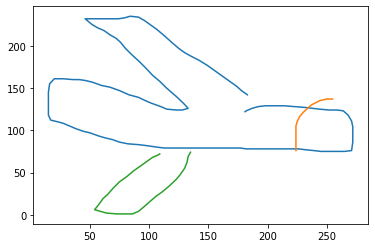

In [60]:
for stroke in raw_entry:
    x = stroke[0]
    y = stroke[1]
    plt.plot(x, y)
plt.show()